<a href="https://colab.research.google.com/github/Yasaswyturlapati/Build-Celestial-Bodies-Database/blob/main/MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten digits recognition using FCNN

MNIST Data

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [3]:
device = torch.device('cuda')
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,)),])

In [4]:
trainset = datasets.MNIST('/content/sample_data', download=True,train=True, transform=transform)
valset = datasets.MNIST('/content/sample_data', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
valloader = torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 103630717.65it/s]


Extracting /content/sample_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 110424515.79it/s]


Extracting /content/sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24317822.32it/s]


Extracting /content/sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6637814.90it/s]


Extracting /content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



In [21]:
for images, labels in trainloader:
  print(images.shape, labels.shape)
  break

torch.Size([64, 1, 28, 28]) torch.Size([64])


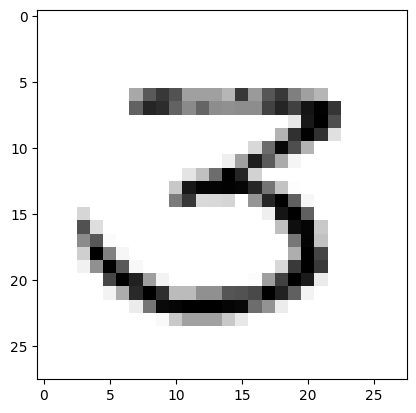

In [22]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

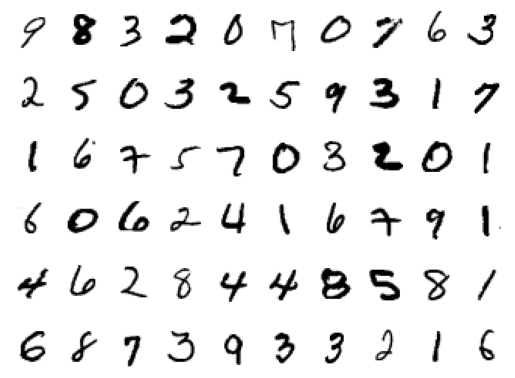

In [23]:
figure = plt.figure()
num_of_images = 60
for index in range(1,num_of_images+1):
  plt.subplot(6,10,index)
  plt.axis('off')
  plt.imshow(images[index].numpy().squeeze(), cmap = 'gray_r')

In [24]:
input_size = 784
hidden_sizes = [128,64]
output_size = 10

model = nn.Sequential (nn.Linear(input_size, hidden_sizes[0]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[0],hidden_sizes[1]),
                       nn.ReLU(),
                       nn.Linear(hidden_sizes[1], output_size),
                       nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [25]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003, momentum=0.9)
epochs = 15
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print('Epoch {} - Training loss: {}'.format(e,running_loss/len(trainloader)))

Epoch 0 - Training loss: 0.6674400400251214
Epoch 1 - Training loss: 0.28090322731749845
Epoch 2 - Training loss: 0.22140200518722983
Epoch 3 - Training loss: 0.18053999209979069
Epoch 4 - Training loss: 0.15305296440066687
Epoch 5 - Training loss: 0.1311523459240127
Epoch 6 - Training loss: 0.11459896709821595
Epoch 7 - Training loss: 0.10091546119085507
Epoch 8 - Training loss: 0.09160014262287887
Epoch 9 - Training loss: 0.08182248896531967
Epoch 10 - Training loss: 0.07530700017773569
Epoch 11 - Training loss: 0.0688597408214163
Epoch 12 - Training loss: 0.0633816059151573
Epoch 13 - Training loss: 0.05854313927434528
Epoch 14 - Training loss: 0.05489250848135317


In [26]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9734


# Handwritten Digits recognition using CNN

Using LeNet architechture

In [2]:
device = torch.device('cuda')
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,)),])

In [3]:
trainset = datasets.MNIST('/content/sample_data', download=True,train=True, transform=transform)
valset = datasets.MNIST('/content/sample_data', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
valloader = torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 184895985.25it/s]

Extracting /content/sample_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 28092693.37it/s]


Extracting /content/sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45011268.59it/s]

Extracting /content/sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4148634.31it/s]

Extracting /content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



In [10]:
images, labels = next(iter(trainloader))
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


Since the MNIST dataset has only 1 channel the LeNet architechture has to be modified in the first row to (N,1,32,32), everything else remains the same.

In [16]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(1,6,5,padding = 2),           # (N,1,32,32) -> (N,6,28,28)
        nn.Tanh(),                  # No dimension change
        nn.AvgPool2d(2,stride=2),   # (N,6,28,28) -> (N,6,14,14)
        nn.Conv2d(6,16,5),          # (N,6,14,14) -> (N,16,10,10)
        nn.Tanh(),                  # No dimension change
        nn.AvgPool2d(2,stride=2)    # (N,16,10,10) -> (N,16,5,5)
      )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.Tanh(),
        nn.Linear(120,84),
        nn.Tanh(),
        nn.Linear(84,10)
    )
  def forward(self,x):
    x = self.cnn_model(x)
    x = x.view(x.size(0),-1)
    x = self.fc_model(x)
    return x

In [19]:
def evaluation(dataloader):
  total, correct = 0, 0
  for data in dataloader:
    inputs,labels = data
    outputs = model(inputs)
    _,pred = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (pred==labels).sum().item()
  return 100*correct/total

In [21]:
model = LeNet()
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr= 0.01)

epochs = 25

for epoch in range(1,epochs+1):
  for inputs, labels in trainloader:
    opt.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()
  print('Epoch: %d/%d' % (epoch, epochs), 'Loss:', loss.item())

Epoch: 1/25 Loss: 0.6197642087936401
Epoch: 2/25 Loss: 0.32785123586654663
Epoch: 3/25 Loss: 0.21959824860095978
Epoch: 4/25 Loss: 0.2702653706073761
Epoch: 5/25 Loss: 0.28426313400268555
Epoch: 6/25 Loss: 0.07470331341028214
Epoch: 7/25 Loss: 0.3042440712451935
Epoch: 8/25 Loss: 0.14415544271469116
Epoch: 9/25 Loss: 0.05083872005343437
Epoch: 10/25 Loss: 0.044979486614465714
Epoch: 11/25 Loss: 0.04335083067417145
Epoch: 12/25 Loss: 0.11730960756540298
Epoch: 13/25 Loss: 0.021672934293746948
Epoch: 14/25 Loss: 0.06537853926420212
Epoch: 15/25 Loss: 0.18298278748989105
Epoch: 16/25 Loss: 0.029520628973841667
Epoch: 17/25 Loss: 0.018683891743421555
Epoch: 18/25 Loss: 0.05522621050477028
Epoch: 19/25 Loss: 0.21935491263866425
Epoch: 20/25 Loss: 0.14110024273395538
Epoch: 21/25 Loss: 0.023496150970458984
Epoch: 22/25 Loss: 0.07804583758115768
Epoch: 23/25 Loss: 0.10985668748617172
Epoch: 24/25 Loss: 0.021366313099861145
Epoch: 25/25 Loss: 0.08027198910713196


In [22]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(valloader), evaluation(trainloader)))

Test acc: 98.28, Train acc: 98.64


# Running on GPU

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5, padding=2),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),
            nn.Conv2d(6, 16, 5),
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

model = LeNet().to(device)

loss_fn = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)
epochs = 20

for epoch in range(1, epochs + 1):
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
    print('Epoch: %d/%d' % (epoch, epochs), 'Loss:', loss.item())

Epoch: 1/20 Loss: 0.5531863570213318
Epoch: 2/20 Loss: 0.43808114528656006
Epoch: 3/20 Loss: 0.3963454067707062
Epoch: 4/20 Loss: 0.1561901867389679
Epoch: 5/20 Loss: 0.15256401896476746
Epoch: 6/20 Loss: 0.35368433594703674
Epoch: 7/20 Loss: 0.0455632247030735
Epoch: 8/20 Loss: 0.16430364549160004
Epoch: 9/20 Loss: 0.19577521085739136
Epoch: 10/20 Loss: 0.08686727285385132
Epoch: 11/20 Loss: 0.16560910642147064
Epoch: 12/20 Loss: 0.12210720032453537
Epoch: 13/20 Loss: 0.050087135285139084
Epoch: 14/20 Loss: 0.009326421655714512
Epoch: 15/20 Loss: 0.03615209832787514
Epoch: 16/20 Loss: 0.15641330182552338
Epoch: 17/20 Loss: 0.15539097785949707
Epoch: 18/20 Loss: 0.028407199308276176
Epoch: 19/20 Loss: 0.0268403347581625
Epoch: 20/20 Loss: 0.06504154205322266


In [32]:
def evaluation(dataloader):
    total, correct = 0, 0
    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, pred = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (pred == labels).sum().item()
    return 100 * correct / total

In [33]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(valloader), evaluation(trainloader)))


Test acc: 98.23, Train acc: 98.29
